# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red"> Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block? sufficiently big to estimate the mean radius, it has to explore
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span> should give the same result with the same efficiency

You can use a Python code similar to the following one to observe how the sampled points distribute into the 3D space:

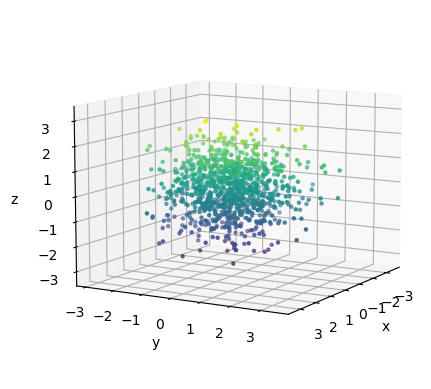

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000
X=np.random.normal(0.0,1.0,M)
Y=np.random.normal(0.0,1.0,M)
Z=np.random.normal(0.0,1.0,M)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

## Metropolis Algorithm

To probe the possible positions of an electron in the surrounding space of the nucleus, we use the Metropolis algorithm. In this problem, it works as follows:

1. It takes the current position $y$.
2. It proposes a random step in 3D space (up to a maximum length L), which leads to a new position $x$.
3. It accepts the proposed move with a probability given by $A\left(x|y\right)= \min\left[1, \frac{P(x)}{P \left( y \right)} \right] $, where $ P\left(\cdot\right)= \vert \Psi \left( \cdot ,t \right) \vert ^2 $ represents the probability distribution function, thus accepting the move towards more probable positions, while rejecting a portion of proposed moves towards less probable positions and remain in the current position.

The proposal of a random step has been made according to two distributions:

- Uniform in $\left(-L,L\right)$.
- Gaussian, with $\mu = 0, \sigma = L$


## Equilibration

Before starting the actual simulation, it is necessary to equilibrate the system to avoid having the particle initially in "improbable" positions that could alter the estimation of the average distance from the center.

To do this, I have set up the `input.dat` file with the following parameters:

```bash
    500 blocks
    1 step per block
    Step width of 1.5
    Initial position of the ground state (GS) at (10, 0, 0)
    Initial position of the excited state (ES) at (20, 0, 0)
    Gaussian transition probability (1) or uniform transition probability (0)
```


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

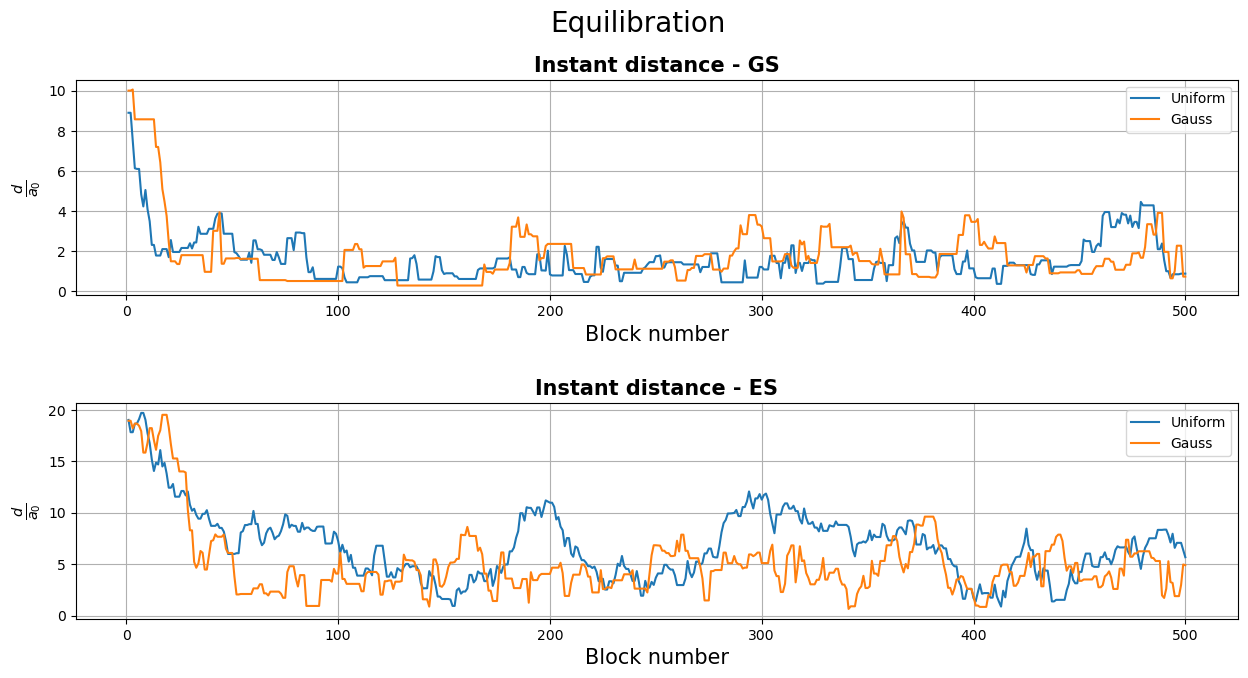

In [7]:
N = 500
x = np.arange(N)+1    # generates the array [1, 2, 3, ..., N]

plt.figure(figsize =(15,7))
plt.suptitle("Equilibration", fontsize=20)

plt.subplot(2,1,1)
dist = np.loadtxt("Equilibration/GS/dist_unif.dat", usecols=(0), delimiter=' ', unpack='true')
plt.plot(x, dist, label = "Uniform")
dist = np.loadtxt("Equilibration/GS/dist_gauss.dat", usecols=(0), delimiter=' ', unpack='true')
plt.plot(x, dist, label = "Gauss")
plt.ylabel(r'$\frac{d}{a_0}$', fontsize=15)
plt.xlabel('Block number', fontsize=15)
plt.grid(True)
plt.title('Instant distance - GS', fontsize=15, fontweight = "bold")
plt.legend()


plt.subplot(2,1,2)
dist = np.loadtxt("Equilibration/ES/dist_unif.dat", usecols=(0), delimiter=' ', unpack='true')
plt.plot(x, dist, label = "Uniform")
dist = np.loadtxt("Equilibration/ES/dist_gauss.dat", usecols=(0), delimiter=' ', unpack='true')
plt.plot(x, dist, label = "Gauss")
plt.ylabel(r'$\frac{d}{a_0}$', fontsize=15)
plt.xlabel('Block number', fontsize=15)
plt.grid(True)
plt.title('Instant distance - ES', fontsize=15, fontweight = "bold")
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.show()

Having observed that the system reaches equilibrium in less than 500 steps, I deemed it effective to add at the beginning of each simulation a cycle of 500 steps (to be on the safe side!) in which the system is allowed to evolve before starting the actual simulation.

## Starting from afar

Before implementing the equilibration, to visualize the trajectory of a particle starting very far from the high probability density zone, I tried a simulation with the following parameters:

```bash
    10000 blocks
    1 step per block
    Step width of 1.5
    Initial position of the ground state (GS) at (30, 0, 0)
    Initial position of the excited state (ES) at (50, 0, 0)
    Uniform transition probability (0)
```
This way, I could clearly observe the particle "heading" towards its orbital.

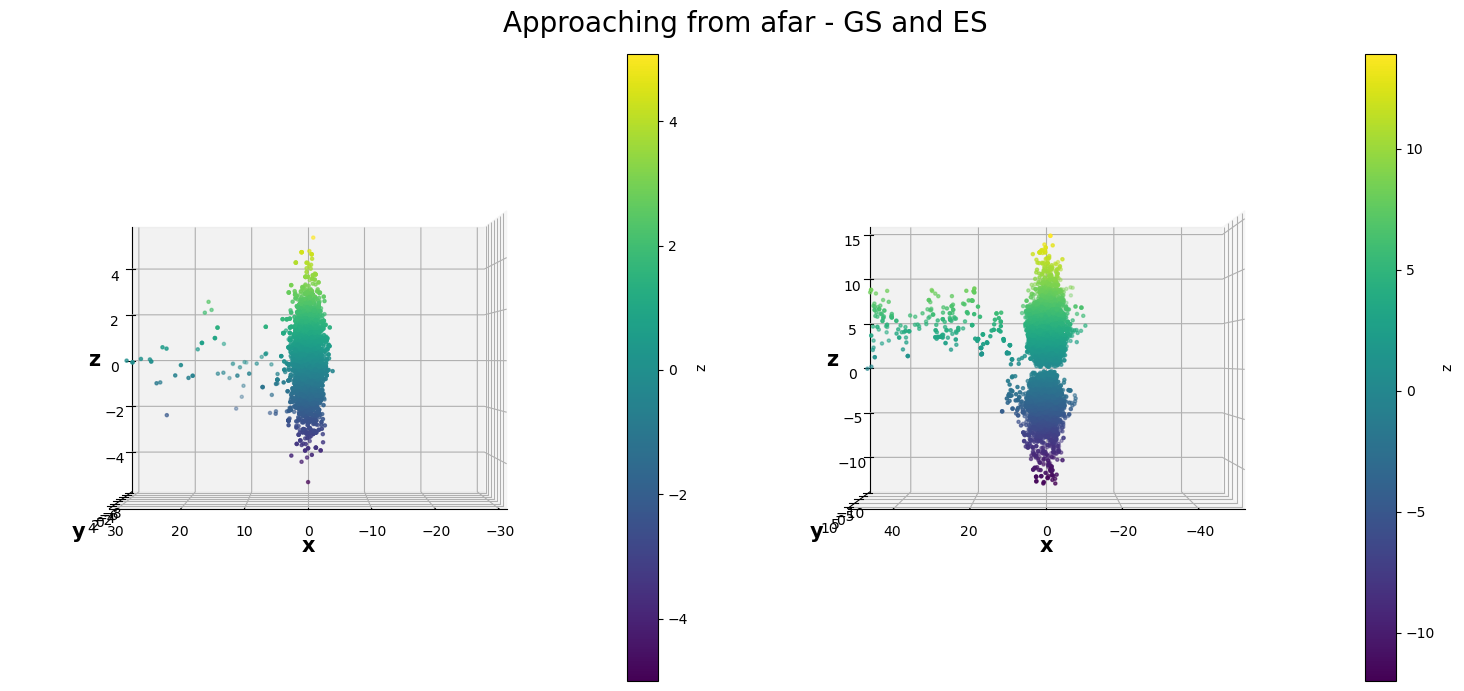

In [55]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (15,7))
plt.suptitle("Approaching from afar - GS and ES", fontsize = 20)
state = ["GS", "ES"]
limsup = [30, 50]

for i in range(0, 2):
    ax = fig.add_subplot(1, 2, i + 1, projection='3d')
    X, Y, Z = np.loadtxt("path/" + state[i] + "/pos_unif.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)
    sc = ax.scatter(X, Y, Z, c=Z, marker='.', cmap='viridis')
    ax.set_xlabel('x', fontweight="bold", fontsize=15)
    ax.set_ylabel('y', fontweight="bold", fontsize=15)
    ax.set_zlabel('z', fontweight="bold", fontsize=15)
    ax.view_init(elev=0, azim=90)
    ax.set_xlim(-limsup[i], limsup[i])
    # ax.set_ylim(-15, limsup[i])
    # ax.set_zlim(-15, limsup[i])
    fig.colorbar(sc, ax=ax, label='z')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Ground State

 Using the Metropolis algorithm to sample the position of a particle in Cartesian coordinates, extracting steps with transition probabilities $T\left( \vec{x}\vert \vec{y}\right)$:

-    Uniform
-    Gaussian

Using the sampled positions to estimate the average distance from the nucleus, both for the ground state (GS) $\left< r \right>_{\Psi_{1,0,0}}$ and first exited state (ES) $\left< r \right>_{\Psi_{2,1,0}}$
As usual, using properly sized data-blocking (`100` blocks of 10^4 steps each) and showing the estimation of the progressive mean with its related statistical uncertainty as the number of blocks increases.

For the simulation:

-    I'm using the Bohr radius ($a_0$) as the length unit to obtain results of the order of $a_0$.
-    I choose a step length for the transition probabilities to achieve an acceptance rate of approximately 50% (in both cases, `L=1.5`, with extractions respectively from a uniform distribution `Random(inf = -L, sup = L)` and a Gaussian distribution `Gauss(mean = 0, sigma = L))`. With this value, I have acceptance rates between approximately 25% and 72%.
-    From the observation of the graphs for equilibration, I choose to start from `(x,y,z)=(2,0,0)` for the ground state and `(x,y,z)=(5,0,0)` for the excited state. However, since I perform equilibration before the simulation, this choice is somewhat irrelevant, as i have seen that in about 500 steps starting from a much greater distance, the electron still reaches the high probability density region.

Final result Unif: 
1.50048
Statistical Uncertainty : 
0.00348995

Final result Gauss: 
1.50244
Statistical Uncertainty : 
0.00365444


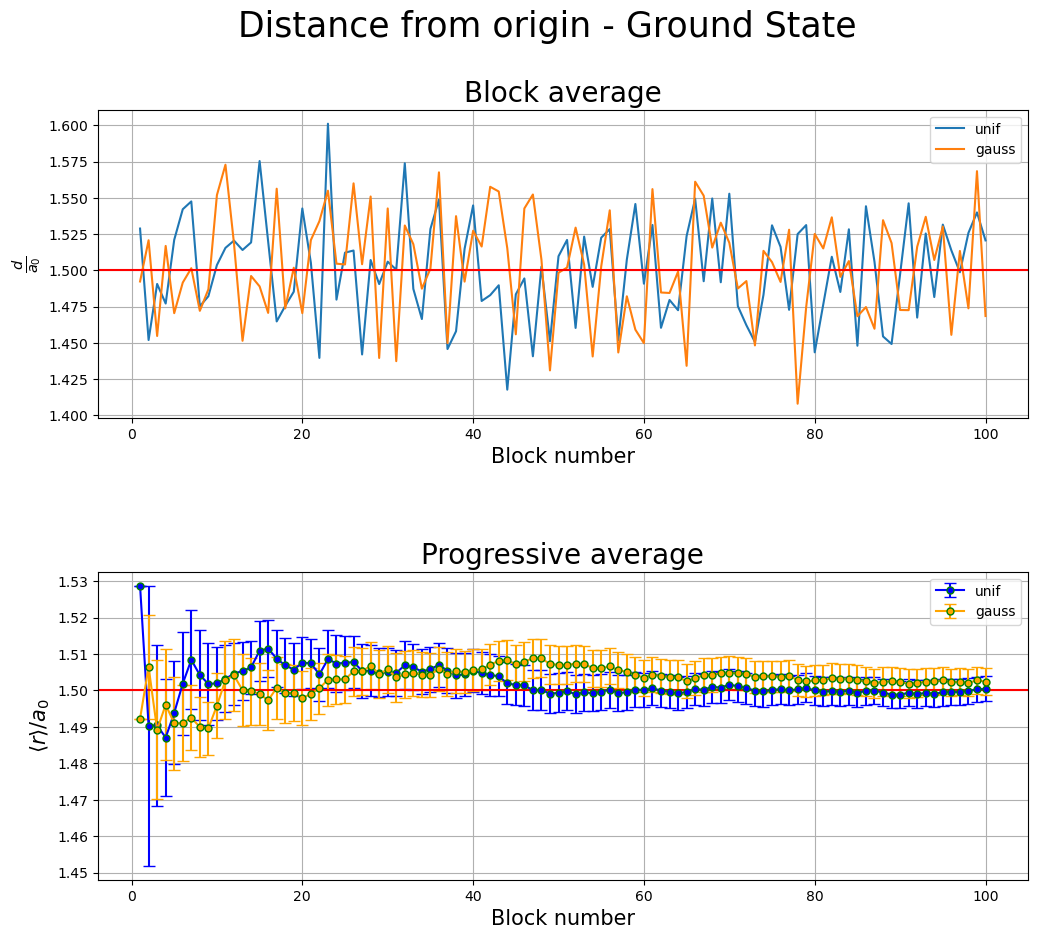

In [50]:
N = 100
x = np.arange(N)+1      # [1,2,...,N]

plt.figure(figsize = (12,10))
plt.suptitle("Distance from origin - Ground State", fontsize = 25)

#---------------------------

plt.subplot(2,1,1)

pos, ave, err = np.loadtxt("final/GS/dist_unif.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.plot(x, pos, label = "unif")
pos, ave, err = np.loadtxt("final/GS/dist_gauss.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.plot(x, pos, label = "gauss")
plt.ylabel(r'$\frac{d}{a_0}$', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=3/2, color = 'r', linestyle = '-')
plt.title('Block average',  fontsize = 20)
plt.legend()

#---------------------------

plt.subplot(2,1,2)

pos, ave, err = np.loadtxt("final/GS/dist_unif.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = "unif", color='blue',ecolor='blue',capsize=4,marker='o',mec='green', ms=5, mew=1)
print('Final result Unif: ')
print(ave[-1])
print('Statistical Uncertainty : ')
print(err[-1])

pos, ave, err = np.loadtxt("final/GS/dist_gauss.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = "gauss", color='orange',ecolor='orange',capsize=4,marker='o',mec='green', ms=5, mew=1)
print('\nFinal result Gauss: ')
print(ave[-1])
print('Statistical Uncertainty : ')
print(err[-1])

plt.ylabel(r'$\langle r\rangle /a_0$', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=3/2, color = 'r', linestyle = '-')
plt.title('Progressive average',  fontsize = 20)
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.show()

## Observations

Both transition probabilities yield similar results, perfectly consistent with each other and with the theoretical prediction. However, it could be expected that the Gaussian step would allow for a more ergodic exploration of space, given the presence of non-zero tails.

## GS probability density

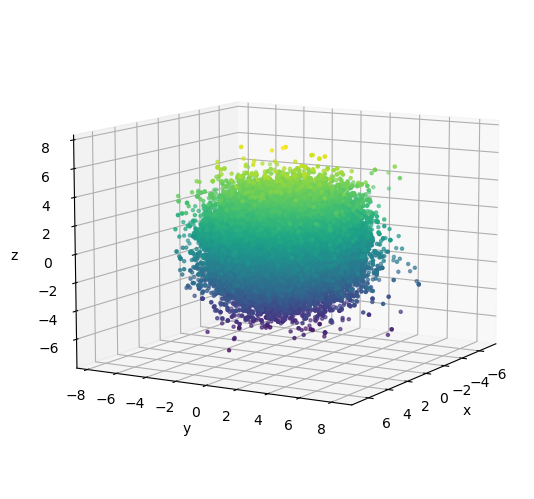

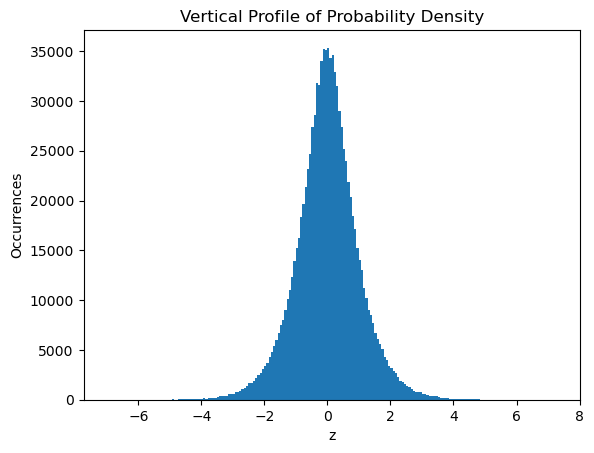

In [58]:
X,Y,Z = np.loadtxt("final/GS/pos_unif.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

fig = plt.figure()
plt.hist(Z,200)
plt.xlabel("z")
plt.ylabel("Occurrences")
plt.title("Vertical Profile of Probability Density")

plt.show()

## Exited State (ES)

Final result Unif: 
4.98136
Statistical Uncertainty : 
0.0142229

Final result Gauss: 
5.02271
Statistical Uncertainty : 
0.0109053


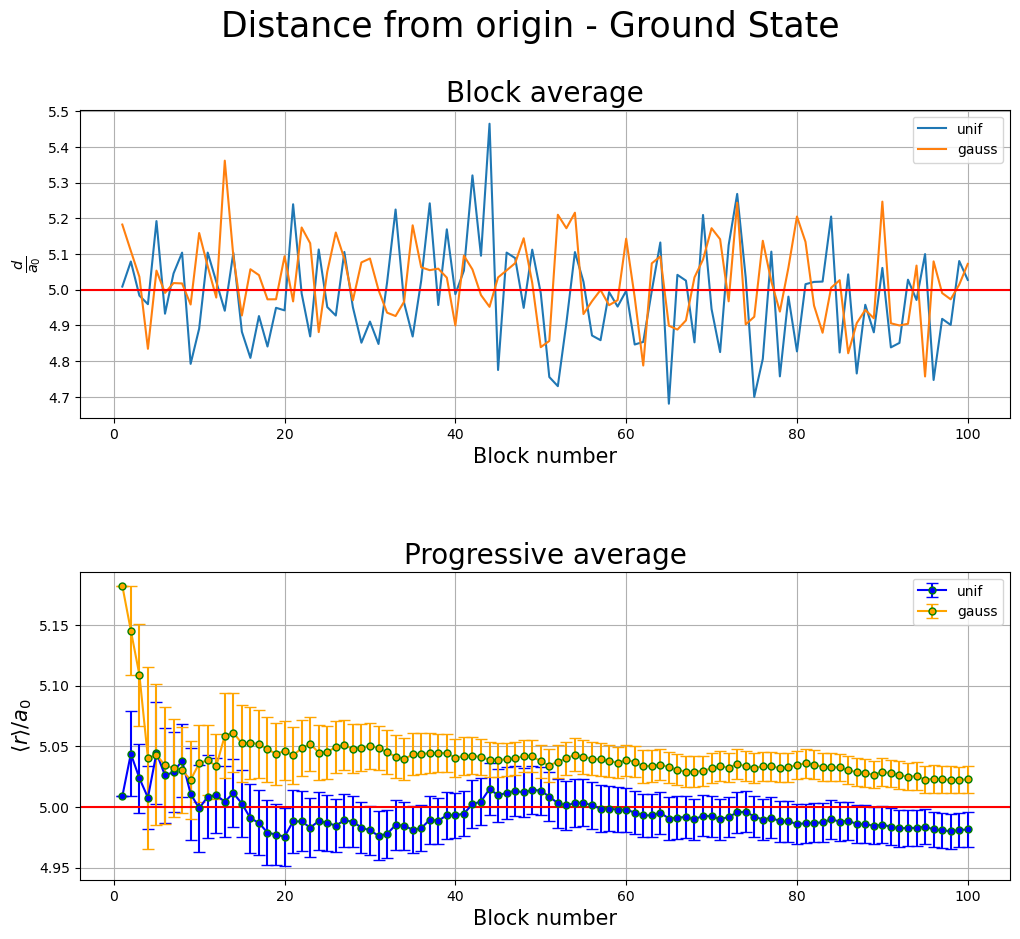

In [60]:
N = 100
x = np.arange(N)+1      # [1,2,...,N]

plt.figure(figsize = (12,10))
plt.suptitle("Distance from origin - Ground State", fontsize = 25)

#---------------------------

plt.subplot(2,1,1)

pos, ave, err = np.loadtxt("final/ES/dist_unif.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.plot(x, pos, label = "unif")
pos, ave, err = np.loadtxt("final/ES/dist_gauss.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.plot(x, pos, label = "gauss")
plt.ylabel(r'$\frac{d}{a_0}$', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=5, color = 'r', linestyle = '-')
plt.title('Block average',  fontsize = 20)
plt.legend()

#---------------------------

plt.subplot(2,1,2)

pos, ave, err = np.loadtxt("final/ES/dist_unif.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = "unif", color='blue',ecolor='blue',capsize=4,marker='o',mec='green', ms=5, mew=1)
print('Final result Unif: ')
print(ave[-1])
print('Statistical Uncertainty : ')
print(err[-1])

pos, ave, err = np.loadtxt("final/ES/dist_gauss.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = "gauss", color='orange',ecolor='orange',capsize=4,marker='o',mec='green', ms=5, mew=1)
print('\nFinal result Gauss: ')
print(ave[-1])
print('Statistical Uncertainty : ')
print(err[-1])

plt.ylabel(r'$\langle r\rangle /a_0$', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.axhline(y=5, color = 'r', linestyle = '-')
plt.title('Progressive average',  fontsize = 20)
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.show()

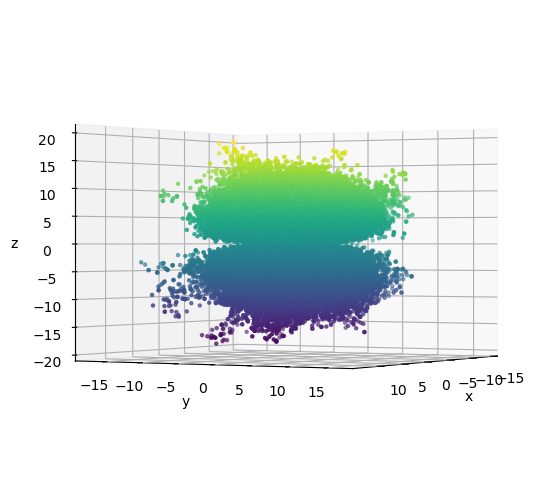

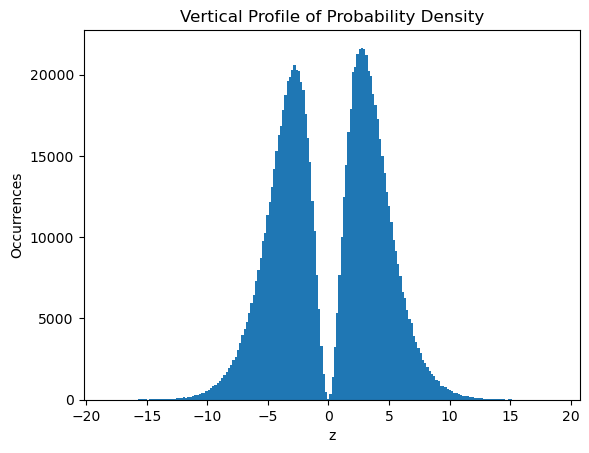

In [62]:
X,Y,Z = np.loadtxt("final/ES/pos_unif.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 30)

plt.show()

fig = plt.figure()
plt.hist(Z,200)
plt.xlabel("z")
plt.ylabel("Occurrences")
plt.title("Vertical Profile of Probability Density")

plt.show()